In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Linear Regression/DATA/Advertising.csv')
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [6]:
X = df.drop('sales',axis=1)
y = df['sales']

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=101)
x_test , x_val , y_test , y_val = train_test_split(x_test , y_test , test_size= 0.5 , random_state = 101)

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
rfr = RandomForestRegressor(n_estimators = 3 , random_state = 101)

In [9]:
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

In [11]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [12]:
mean_absolute_error(y_pred, y_test)

0.853333333333333

In [13]:
mean_squared_error(y_pred , y_test)**0.5

1.1031268688998959

In [42]:
rfr = RandomForestRegressor(n_estimators = 11 , random_state = 101)
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
mean_absolute_error(y_pred, y_test)

0.6600000000000003

In [40]:
mean_squared_error(y_pred , y_test)**0.5

0.7770786573246117

In [33]:
error = []
for i in range(10,50):
    rfr = RandomForestRegressor(n_estimators=i , random_state=101)
    rfr.fit(x_train , y_train)
    y_preds = rfr.predict(x_test)
    error.append(mean_squared_error(y_test , y_preds)**0.5)
    error.append(n)

error

[0.7831368547918899,
 0.7770786573246117,
 0.7938114222370919,
 0.7913997785363956,
 0.7878941622352293,
 0.8213998890782598,
 0.8144455872452949,
 0.824016662578866,
 0.8462030907423428,
 0.8483627162043453,
 0.8599040644164908,
 0.8659254636175071,
 0.8717422629440168,
 0.8910452079984005,
 0.884684828269577,
 0.8762288894271104,
 0.8705843783133912,
 0.8545226515713136,
 0.8626381384005284,
 0.8670620915656511,
 0.8542009478215644,
 0.8481885781066164,
 0.846174564276879,
 0.8384243022972218,
 0.848920374131027,
 0.8585352183157281,
 0.8580337784846093,
 0.8570488603137987,
 0.8489291772123501,
 0.848159885728986,
 0.8490720424871689,
 0.8399814922939611,
 0.839934737233668,
 0.8442448780405538,
 0.8360235845263558,
 0.8426525823170521,
 0.8386317696799779,
 0.8399033299983197,
 0.8328764372475802,
 0.8246744926824289]

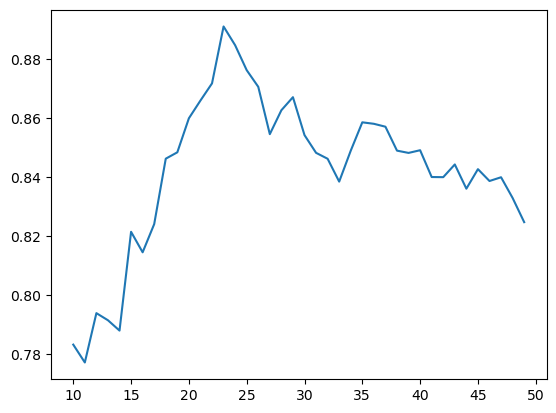

In [34]:
plt.plot(range(10,50) , error)

## choosing 11

In [43]:
y_val_pred = rfr.predict(x_val)
mean_absolute_error(y_val_pred, y_val)

0.5848484848484847

In [44]:
mean_squared_error(y_val_pred , y_val)**0.5

0.7157303769240138

In [45]:
final_model = RandomForestRegressor(n_estimators=11 , random_state=101)
final_model.fit(X , y)

RandomForestRegressor(n_estimators=11, random_state=101)

In [46]:
import joblib
joblib.dump(final_model , 'final_model.pkl')
joblib.dump(list(X.columns) , 'col_names.pkl')

['col_names.pkl']

In [48]:
new_col = joblib.load('col_names.pkl')
new_col

['TV', 'radio', 'newspaper']

In [49]:
model = joblib.load('final_model.pkl')

In [50]:
model.predict([[151.5 , 41.3 , 58.5]])

C:\Users\Kandarp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([18.15454545])

## It was exactly same